# 1. Read data from SQL Database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
# create an SQL connection with SQLite database

connection = sqlite3.connect(r'C:\Users\rassu\NLP_capstone_project\password_data.sqlite')

In [3]:
# store the database data into 'data' dataframe
# table name can be found at this web address: https://sqliteonline.com/

data = pd.read_sql_query("SELECT * FROM Users", connection)

In [4]:
data.shape

(100000, 3)

In [5]:
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


# 2. Data Cleaning

In [6]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

### 2.1 Remove irrelevant features

In [7]:
data.drop(['index'], axis=1, inplace=True)

In [8]:
data.head()

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


### 2.2 Check for duplicate rows

In [9]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [10]:
data.duplicated().sum()

0

### 2.3 Check for missing values

In [11]:
data.isnull()

,password,strength
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
99995,False,False
99996,False,False
99997,False,False
99998,False,False


In [12]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [13]:
# means no row has NAN value

data.isnull().any().sum()

0

### 2.4 Check data type of every feature

In [14]:
data.dtypes

password    object
strength     int64
dtype: object

### 2.5 Check if 'strength' column has irrelevant values

In [15]:
data['strength']

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [16]:
# the values in 'strength' column are expected to be 0, 1, and 2 
# 0 stands for 'weak', 1 is 'moderate', and 3 is 'strong'

data['strength'].unique()

array([1, 2, 0], dtype=int64)

# 3. Perform Semantic Analysis      
          
          a) How many passwords hold only numeric characters?
          b) How many passwords hold only uppercase characters? 
          c) How many passwords hold only alphabetic characters?
          d) How many passwords hold alpha-numeric characters? 
          e) How many passwords hold title-case characters? 
          f) How many passwords hold some special special characters?

In [17]:
data.columns

Index(['password', 'strength'], dtype='object')

In [18]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [19]:
data['password'][0]

'zxe870819'

In [20]:
type(data['password'][0])

str

In [21]:
data['password'].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [22]:
# the numeric passwords only

data[data['password'].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [23]:
# 26 users have only numers in their passwords

data[data['password'].str.isnumeric()].shape

(26, 2)

In [24]:
# the uppercase passwords only

data[data['password'].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [25]:
# around 1500 users have only uppercase letters in their passwords

data[data['password'].str.isupper()].shape

(1506, 2)

In [26]:
# the alphabetic passwords only

data[data['password'].str.isalpha()]

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [27]:
# 50 users have only alphabet letters their passwords

data[data['password'].str.isalpha()].shape

(50, 2)

In [28]:
# the alphanumeric passwords only

data[data['password'].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [29]:
# around 97k users have alphanumeric passwords, which is almost 97% of all users

data[data['password'].str.isalnum()].shape

(97203, 2)

In [30]:
# the capitalized passwords only

data[data['password'].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [31]:
# around 900 users have the first letter in their password being capitalized 

data[data['password'].str.istitle()].shape

(932, 2)

In [32]:
import string

In [33]:
# all the special characters defined in 'string' package

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
def findSpecialCharacter(row):
    
    """
    checks if password has a special character
    """  
    
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [35]:
data['password'].apply(findSpecialCharacter)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [36]:
# 2663 users have special characters in their passwords, which is about 2.6%

data[data['password'].apply(findSpecialCharacter)==1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


# 4. Feature Engineering

In [37]:
"""

The password strength depends on the following features:

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

"""

'\n\nThe password strength depends on the following features:\n\n    Length of password\n    Frequency of Lowercase Characters\n    Frequency of Uppercase Characters\n    Frequency of Numeric Characters\n    Frequency of Special Characters\n\n'

In [38]:
len(data['password'][0])

9

In [39]:
# length of every password

data['password'].str.len()

0         9
1        12
2         9
3        23
4         8
         ..
99995    10
99996    10
99997     9
99998     9
99999    11
Name: password, Length: 100000, dtype: int64

In [40]:
# create new column 'length' to store the number of characters in every password

data['length'] = data['password'].str.len()

In [41]:
password = 'Rassul777'

In [42]:
[char for char in password if char.islower()]

['a', 's', 's', 'u', 'l']

In [43]:
# frequency of lowercase characters

len([char for char in password if char.islower()])

5

In [44]:
# some passwords are very long, and number of lowercase characters can  also be high
# so normalize frequency to keep it in the range between 0 and 1

len([char for char in password if char.islower()])/len(password)

0.5555555555555556

In [45]:
def frequencyLowercase(row):
    
    """returns the frequency of lowercase characters"""
    
    return len([char for char in row if char.islower()])/len(row)

In [46]:
def frequencyUppercase(row):
    
    """returns the frequency of uppercase characters"""
    
    return len([char for char in row if char.isupper()])/len(row)

In [47]:
def frequencyNumeric(row):
    
    """returns the frequency of numeric characters"""
    
    return len([char for char in row if char.isdigit()])/len(row)

In [48]:
# apply every f-n, and store the result into corresponding column
# also round every ratio to 3 decimal points 

data['lowercase_freq'] = np.round(data['password'].apply(frequencyLowercase), 3)

data['uppercase_freq'] = np.round(data['password'].apply(frequencyUppercase), 3)

data['numeric_freq'] = np.round(data['password'].apply(frequencyNumeric), 3)

In [49]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [50]:
def frequencySpecialCharacter(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [51]:
data['special_char_freq'] = np.round(data['password'].apply(frequencySpecialCharacter), 3)

In [52]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0
1,xw46454nr23l,1,12,0.417,0.0,0.583,0
2,soporte13,1,9,0.778,0.0,0.222,0
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,1
4,c443balg,1,8,0.625,0.0,0.375,0


In [53]:
# normalizing 'special_char_freq' feature

data['special_char_freq'] = data['special_char_freq']/data['length']

In [54]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


# 5. Perform Descriptive Statistics

In [55]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

In [56]:
data[['length', 'strength']].groupby(['strength']).agg(['min', 'max', 'mean', 'median'])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [57]:
cols = ['length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq']

In [58]:
# observation of trends:
# longer the length, higher the strength
# password is not strong if max portion is occupied by alphabetic characters only.
# password has more strength if the character types are spread in decent proportions.


for col in cols:
    print(col)
    print(data[[col, 'strength']].groupby(['strength']).agg(['min', 'max', 'mean', 'median']))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


numeric_freq
         numeric_freq                        
                  min    max      mean median
strength                                  

In [59]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

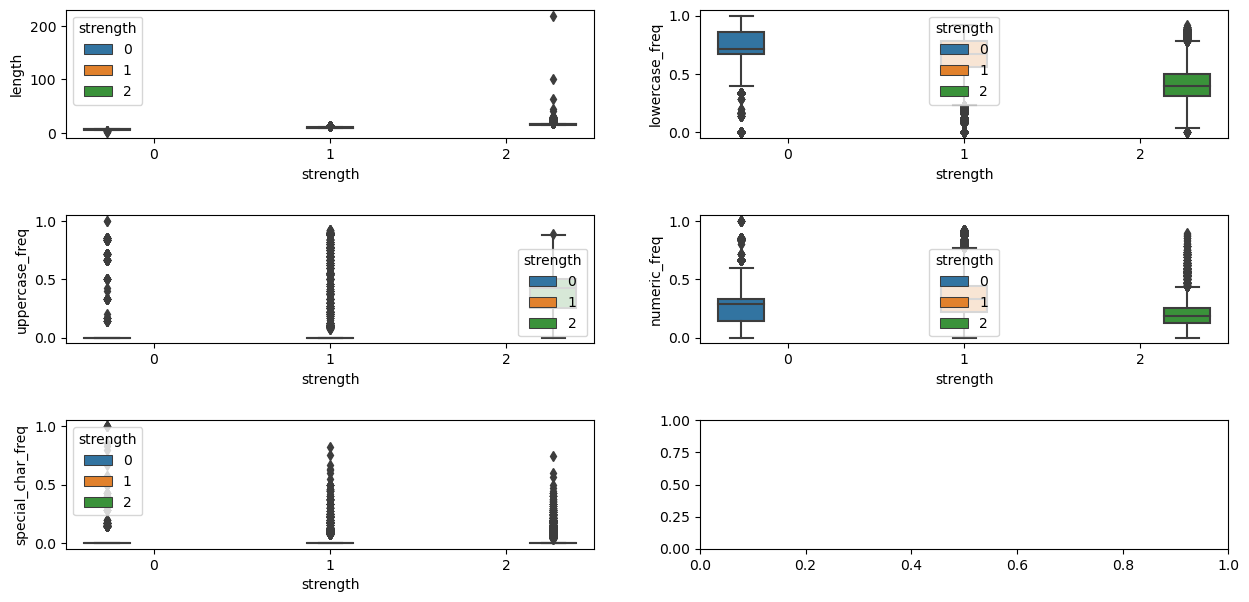

In [60]:
# insights:
# higher lowercase frequency is seen in low strength passwords. 
# in numeric frequency there is a split of majority poplutation of strength 1 and 2 
# in uppercase frequency, there is a trend but not as strong as length or lowercase frequency    
# in special frequency trend is similar but stronger than above 
# higher strength passwords have more type breaks.


fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3,2, figsize=(15,7))

sns.boxplot(x='strength', y='length', hue='strength', ax=ax1, data=data)
sns.boxplot(x='strength', y='lowercase_freq', hue='strength', ax=ax2, data=data)
sns.boxplot(x='strength', y='uppercase_freq', hue='strength', ax=ax3, data=data)
sns.boxplot(x='strength', y='numeric_freq', hue='strength', ax=ax4, data=data)
sns.boxplot(x='strength', y='special_char_freq', hue='strength', ax=ax5, data=data)

plt.subplots_adjust(hspace=0.6)

# 6. Feature Importance

In [61]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

In [62]:
def get_dist(data, feature):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength', y=feature, data=data)
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature], color='red', label='0', hist=False)
    sns.distplot(data[data['strength']==1][feature], color='blue', label='1', hist=False)
    sns.distplot(data[data['strength']==2][feature], color='orange', label='2', hist=False)
    plt.legend()
    plt.show()

In [63]:
import warnings
from warnings import filterwarnings

filterwarnings('ignore')

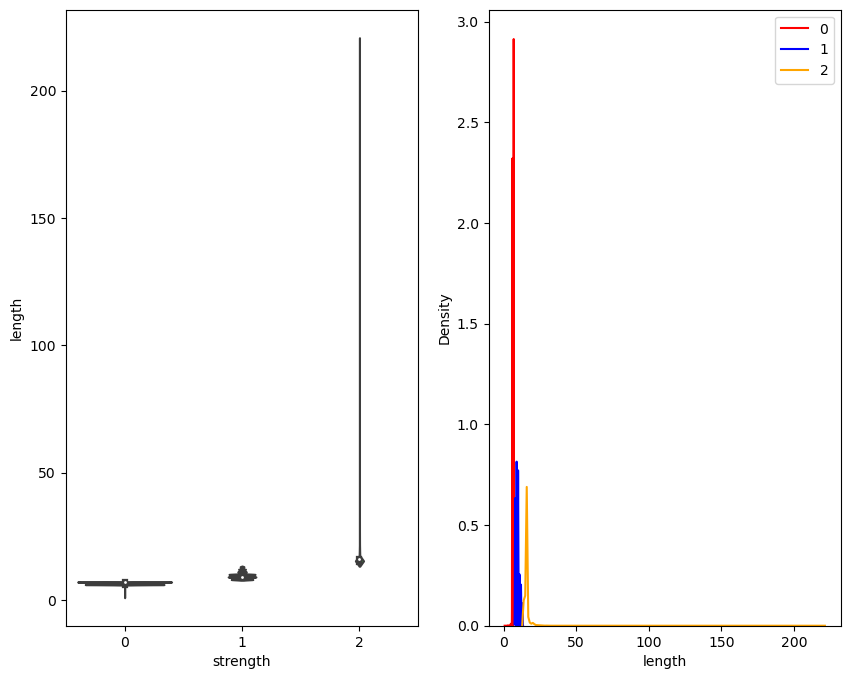

In [64]:
# we have few overlappping region in distribution plot 
# the 'length' value is higher for strong passwords than moderate and weak passwords
# it means 'length' is a interesting feature as we have very less overlapping region

# there is less overlappping based on violinplot
# 'length' feature is amazing & useful in determining the strength

get_dist(data, 'length')

In [65]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

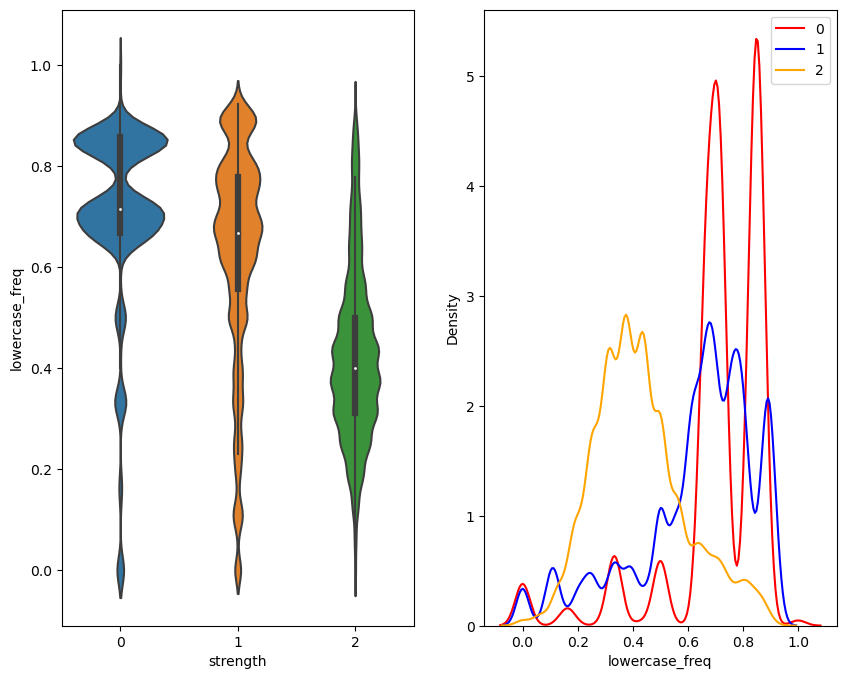

In [66]:
# there is some kind of overlappping region in distribution plot 
# lowercase frequency is smaller in strong passwords than moderate and weak passwords
# it means lowercase frequency is an interesting feature up to some extent because of the overlapping region
# this feature lowercase frequency is an interesting feature upto some extent in determining the strength

get_dist(data, 'lowercase_freq')

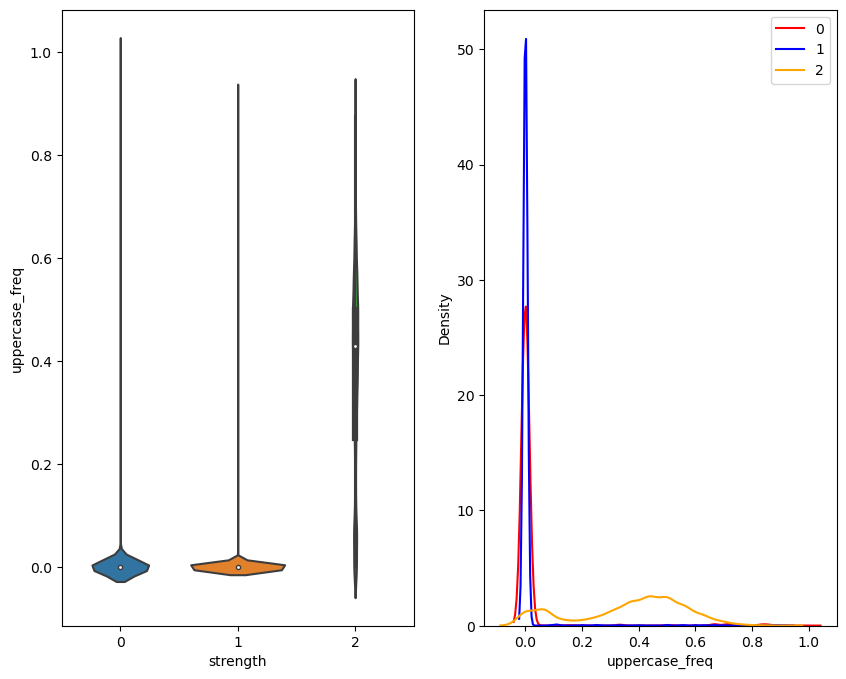

In [67]:
# there is a quite high overlappping region in distribution plot 
# it means uppercase frequency is not that much interesting feature as have some overlapping region 
# uppercase frequency feature is not an interesting feature in determining the strength

get_dist(data, 'uppercase_freq')

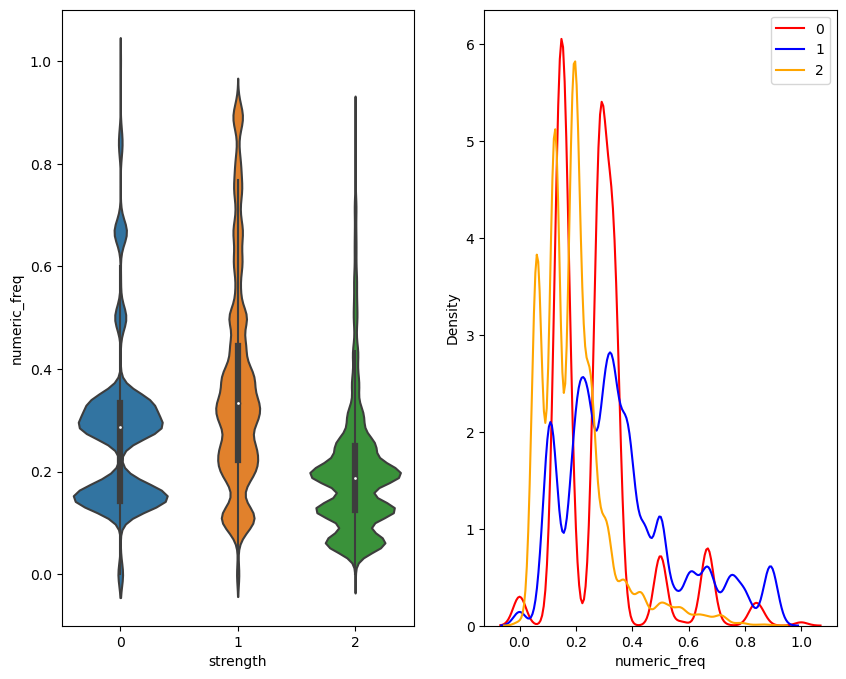

In [68]:
# there is a quite high overlappping region in distribution plot 
# it means numeric is not that much interesting feature as have some overlapping region
# numeric frequency feature is not an interesting feature in determining the strength

get_dist(data, 'numeric_freq')

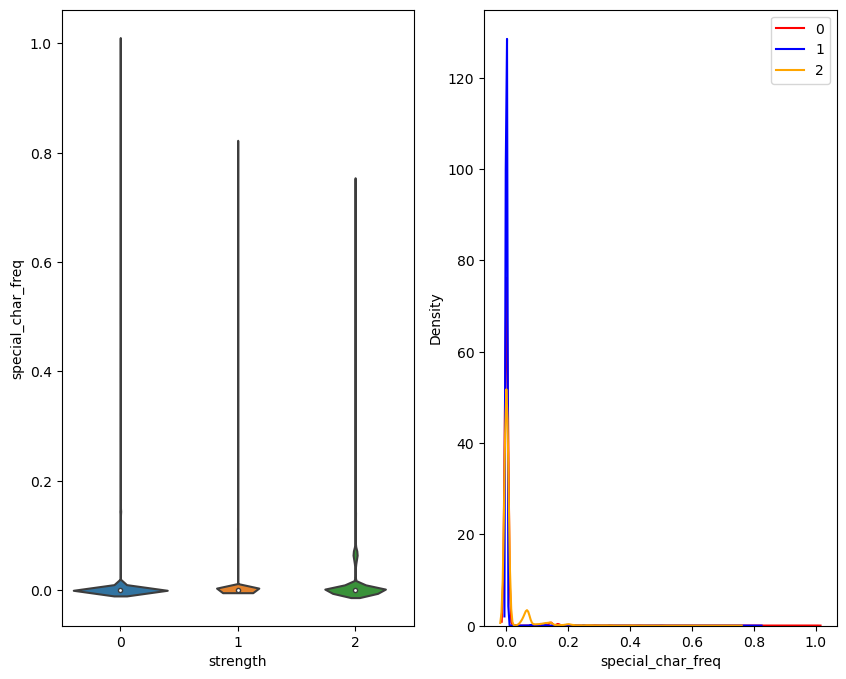

In [69]:
get_dist(data, 'special_char_freq')

In [70]:
# key insight: length & lowercase frequency are important features

# 7. Apply TF-IDF on data

In [71]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000


In [72]:
data

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000000
2,soporte13,1,9,0.778,0.0,0.222,0.000000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043478
4,c443balg,1,8,0.625,0.0,0.375,0.000000
...,...,...,...,...,...,...,...
99995,obejofi215,1,10,0.700,0.0,0.300,0.000000
99996,fmiopvxb64,1,10,0.800,0.0,0.200,0.000000
99997,czvrbun38,1,9,0.778,0.0,0.222,0.000000
99998,mymyxe430,1,9,0.667,0.0,0.333,0.000000


In [73]:
# random shuffle for robustness of ML model

dataframe = data.sample(frac=1)

In [74]:
dataframe

,password,strength,length,lowercase_freq,uppercase_freq,numeric_freq,special_char_freq
11140,1apples516,1,10,0.600,0.000,0.400,0.0
80945,oreguv333,1,9,0.667,0.000,0.333,0.0
94953,123qt3w1,1,8,0.375,0.000,0.625,0.0
33859,vintilatori1,1,12,0.917,0.000,0.083,0.0
45604,bg18eoa,0,7,0.714,0.000,0.286,0.0
...,...,...,...,...,...,...,...
73212,057WecUTaXEkiG,2,14,0.357,0.429,0.214,0.0
23851,matheson7,1,9,0.889,0.000,0.111,0.0
82513,omgjulian1,1,10,0.900,0.000,0.100,0.0
84614,mauro44,0,7,0.714,0.000,0.286,0.0


In [75]:
x = list(dataframe['password'])

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [77]:
vectorizer = TfidfVectorizer(analyzer = 'char')

In [78]:
X = vectorizer.fit_transform(x)

In [79]:
X.shape

(100000, 99)

In [80]:
dataframe['password'].shape

(100000,)

In [81]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [82]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [83]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.40518786, 0.        , 0.        , 0.        ,
       0.29346132, 0.30748606, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.19510522, 0.        , 0.        ,
       0.        , 0.2285572 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.28134656, 0.        ,
       0.        , 0.        , 0.64423414, 0.        , 0.        ,
       0.26581503, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [84]:
dataframe['password']

11140        1apples516
80945         oreguv333
94953          123qt3w1
33859      vintilatori1
45604           bg18eoa
              ...      
73212    057WecUTaXEkiG
23851         matheson7
82513        omgjulian1
84614           mauro44
96330          gokhan57
Name: password, Length: 100000, dtype: object

In [85]:
len(vectorizer.get_feature_names_out())

99

In [86]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [87]:
df2 = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [88]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 8. Apply Machine Learning

In [89]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'numeric_freq', 'special_char_freq'],
      dtype='object')

In [90]:
df2['length'] = dataframe['length']
df2['lowercase_freq'] = dataframe['lowercase_freq']

In [91]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [92]:
y = dataframe['strength']

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2)

In [95]:
X_train.shape

(80000, 101)

In [96]:
y_train.shape

(80000,)

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
clf = LogisticRegression(multi_class='multinomial')

In [99]:
clf.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [100]:
y_pred = clf.predict(X_test)

In [101]:
y_pred

array([1, 2, 1, ..., 1, 1, 1], dtype=int64)

In [102]:
from collections import Counter

In [103]:
Counter(y_pred)

Counter({1: 16900, 2: 1775, 0: 1325})

# 9. Do prediction on sample data

In [104]:
password = '%@123abcd'

In [105]:
sample_array = np.array([password])

In [106]:
sample_matrix = vectorizer.transform(sample_array)

In [107]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [108]:
sample_matrix.toarray().shape

(1, 99)

In [109]:
password

'%@123abcd'

In [110]:
len(password)

9

In [111]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [112]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [113]:
np.append(sample_matrix.toarray(), (9,0.444)).shape

(101,)

In [114]:
np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [115]:
np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101).shape

(1, 101)

In [116]:
new_matrix = np.append(sample_matrix.toarray(), (9,0.444)).reshape(1,101)

In [117]:
clf.predict(new_matrix)

array([0], dtype=int64)

In [118]:
# create a f-n to automate the prediction

def predict():
    password = input("Enter a password:")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    password_length = len(password)
    normalized_length_lowercase = len([char for char in password if char.islower()])/password_length
    
    new_matrix2 = np.append(sample_matrix.toarray(), (password_length, normalized_length_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0:
        return "Password is weak"
    elif result == 1:
        return "Password is moderate"
    else:
        return "Password is strong"

In [119]:
predict()

Enter a password:sadada324242?%$@*":


'Password is weak'

# 10. Model Evaluation

In [120]:
# check the accuracy of my model using confusion_matrix, accuracy_score

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [121]:
accuracy_score(y_test, y_pred)

0.79965

In [122]:
confusion_matrix(y_test, y_pred)

array([[  708,  2048,     2],
       [  551, 13848,   336],
       [   66,  1004,  1437]], dtype=int64)

In [123]:
# create report for my model

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.26      0.35      2758
           1       0.82      0.94      0.88     14735
           2       0.81      0.57      0.67      2507

    accuracy                           0.80     20000
   macro avg       0.72      0.59      0.63     20000
weighted avg       0.78      0.80      0.78     20000

